<a href="https://colab.research.google.com/github/Carhuacusma/PDI_Examen_Parcial/blob/main/PDI_Examen_Parcial_2020_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento Digital de Imágenes - Examen Parcial

## Instrucciones

1.	El examen consta de 1 pregunta y tendrá 24 horas para resolverla en equipos de tres integrantes (en caso de sobrar uno o dos alumnos pueden crearse, máximo dos equipos de 2 integrantes).
2.	El trabajo será entregado hasta las 7:59:59 am del sábado 10 de octubre. En seguida habrá una exposición, máximo 10 minutos por grupo, de los grupos de trabajo de 8 a 10 am.
3.	El examen cuenta con un docente académico, el cual estará conectado durante los primeros 20 minutos del examen.
4.	Las dudas conceptuales sobre el examen han de presentarse dentro de los primeros 20 minutos mediante un correo al profesor GONZALEZ VALENZUELA, RICARDO EUGENIO a pcsirgon@upc.edu.pe.
5.	Los inconvenientes técnicos pueden presentarse a pasado los primeros 20 minutos, puede comunicarlo al profesor GONZALEZ VALENZUELA, RICARDO EUGENIO a pcsirgon@upc.edu.pe.
6.	El profesor en mención solo recibirá correos provenientes de las cuentas UPC, de ninguna manera se recibirán correos de cuentas públicas. 
7.	Ante problemas técnicos, debe de forma obligatoria adjuntar evidencias del mismo, como capturas de pantalla, videos, fotos, etc. Siendo requisito fundamental que, en cada evidencia se pueda apreciar claramente la fecha y hora del sistema operativo del computador donde el alumno está rindiendo el examen. 
8.	Los correos sobre problemas técnicos se recibirán hasta 15 minutos luego de culminado el examen.


## Integrantes

*   Alumno 1: <font color='Black'> u20181A010 - Joaquín Adrián Galván Díaz</font><br>
*   Alumno 2: <font color='Black'> u201818067 - Dante Brandon Moreno Carhuacusma</font><br>

## Caso de Estudio - Reconocimiento óptico de caracteres (Optical character recognition - OCR)

1. Tome diversas fotografías de hojas en blanco con texto (no hay problema si el texto de una hoja es del mismo tamaño, fuente y color).

2. La hoja puede aparecer girada pero no distorsionada (i.e.: la hoja en la fotografia debe aparecer rectangular posible, sin distorsiones de esquinas). Sin embargo, puede aparecer rotada.

3. Aplicando diversas técnicas de procesamiento digital de imágenes, transcribir el texto de las imagenes.


## Resolución

### Metodología

<font color='green'>Aquí **enumere** y **explique** los pasos de su metodología </font>

#### Preprocesamiento

Primero leemos las imágenes de un repositorio, cargadas como un arreglo de imágenes.

[NOTA: No redacción, lit es propuesta a ver si sí se hace o no XD !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!]

*Propuesta*: 
1. Normalizar el modelo de color: Grayscale
2. Preprocesar las imágenes rectificarlas en caso estén inclinadas.
3. Modificar la resolución de ser necesario para obtener imágenes del mismo tamaño.
4. Filtro para quitar ruido en la imagen

### Implementación

In [ ]:
# Implemente aqui la solución propuesta en su metodología (sientase libre de usar mas celdas de código si lo requiere)
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow

#### Preprocesamiento

Size de la foto tomada con celular: (4032, 2268, 3)


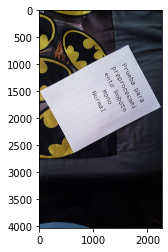

In [152]:
test = io.imread('https://raw.githubusercontent.com/Carhuacusma/PDI_Examen_Parcial/main/Data/test.jpg')
print("Size de la foto tomada con celular:", test.shape)
plt.imshow(test)

In [153]:
test = cv2.cvtColor(test,cv2.COLOR_RGB2GRAY)

Tomando como ayuda este [tutorial](https://https://www.pyimagesearch.com/2014/04/21/building-pokedex-python-finding-game-boy-screen-step-4-6/). 

In [154]:
test = cv2.bilateralFilter(test,10,75,75)

In [157]:
ret, thresh = cv2.threshold(test, 170, 255, 0)

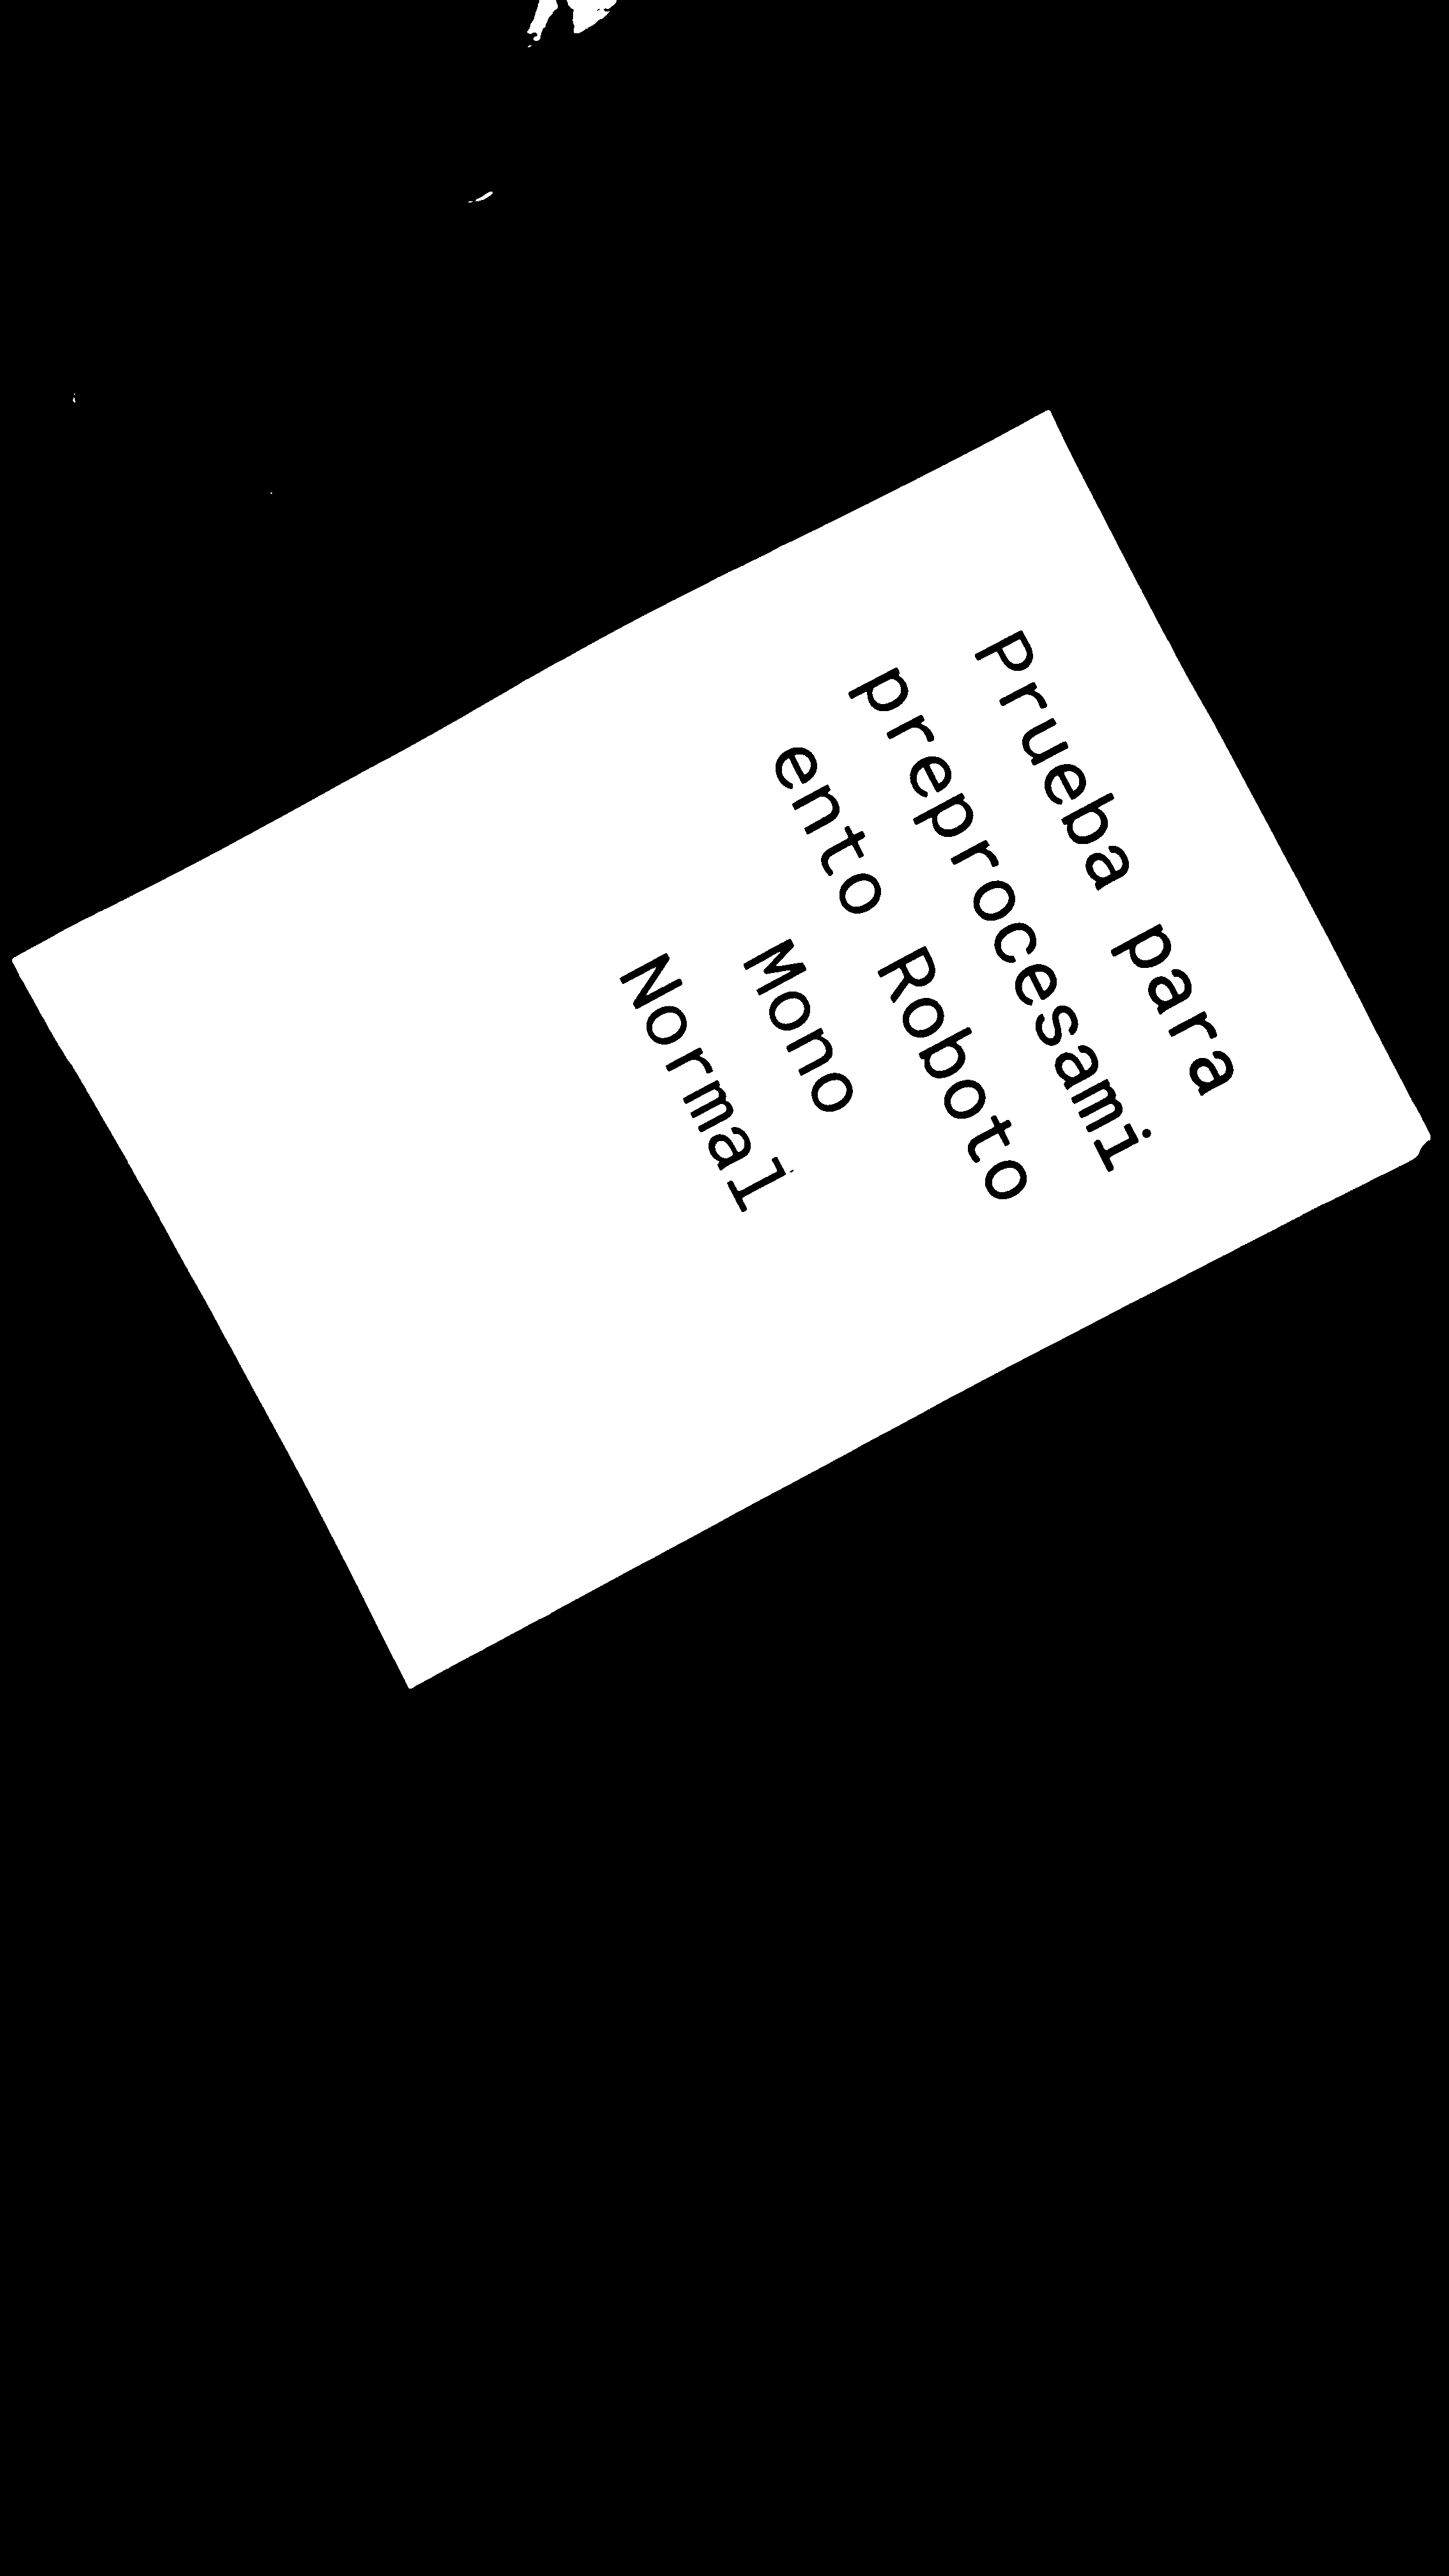

In [158]:
cv2_imshow(thresh)

In [159]:
contornos, jerarquia = cv2.findContours(test, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #Contornos de la imagen de los bordes
print(len(contornos))

1


In [160]:
contornos, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(len(contornos))

78


In [161]:
len(contornos[0])

4

In [162]:
cnts = sorted(contornos, key = cv2.contourArea, reverse = True)

In [163]:
len(cnts[0])

4823

In [164]:
cnts = cnts[:15]

In [165]:
screenCnt = 0
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.015 * peri, True)
	# if our approximated contour has four points, then
	# we can assume that we have found our screen
	if len(approx) == 4:
		screenCnt = approx
		break

In [166]:
screenCnt

array([[[1642,  642]],

       [[  19, 1501]],

       [[ 640, 2642]],

       [[2238, 1783]]], dtype=int32)

In [167]:
cv2.drawContours(test, [screenCnt], -1, (0, 255, 0), 3)

array([[24, 23, 24, ..., 24, 24, 24],
       [24, 24, 24, ..., 24, 24, 24],
       [24, 24, 24, ..., 24, 24, 24],
       ...,
       [91, 91, 91, ...,  3,  3,  3],
       [91, 91, 91, ...,  3,  3,  4],
       [91, 91, 91, ...,  4,  3,  3]], dtype=uint8)

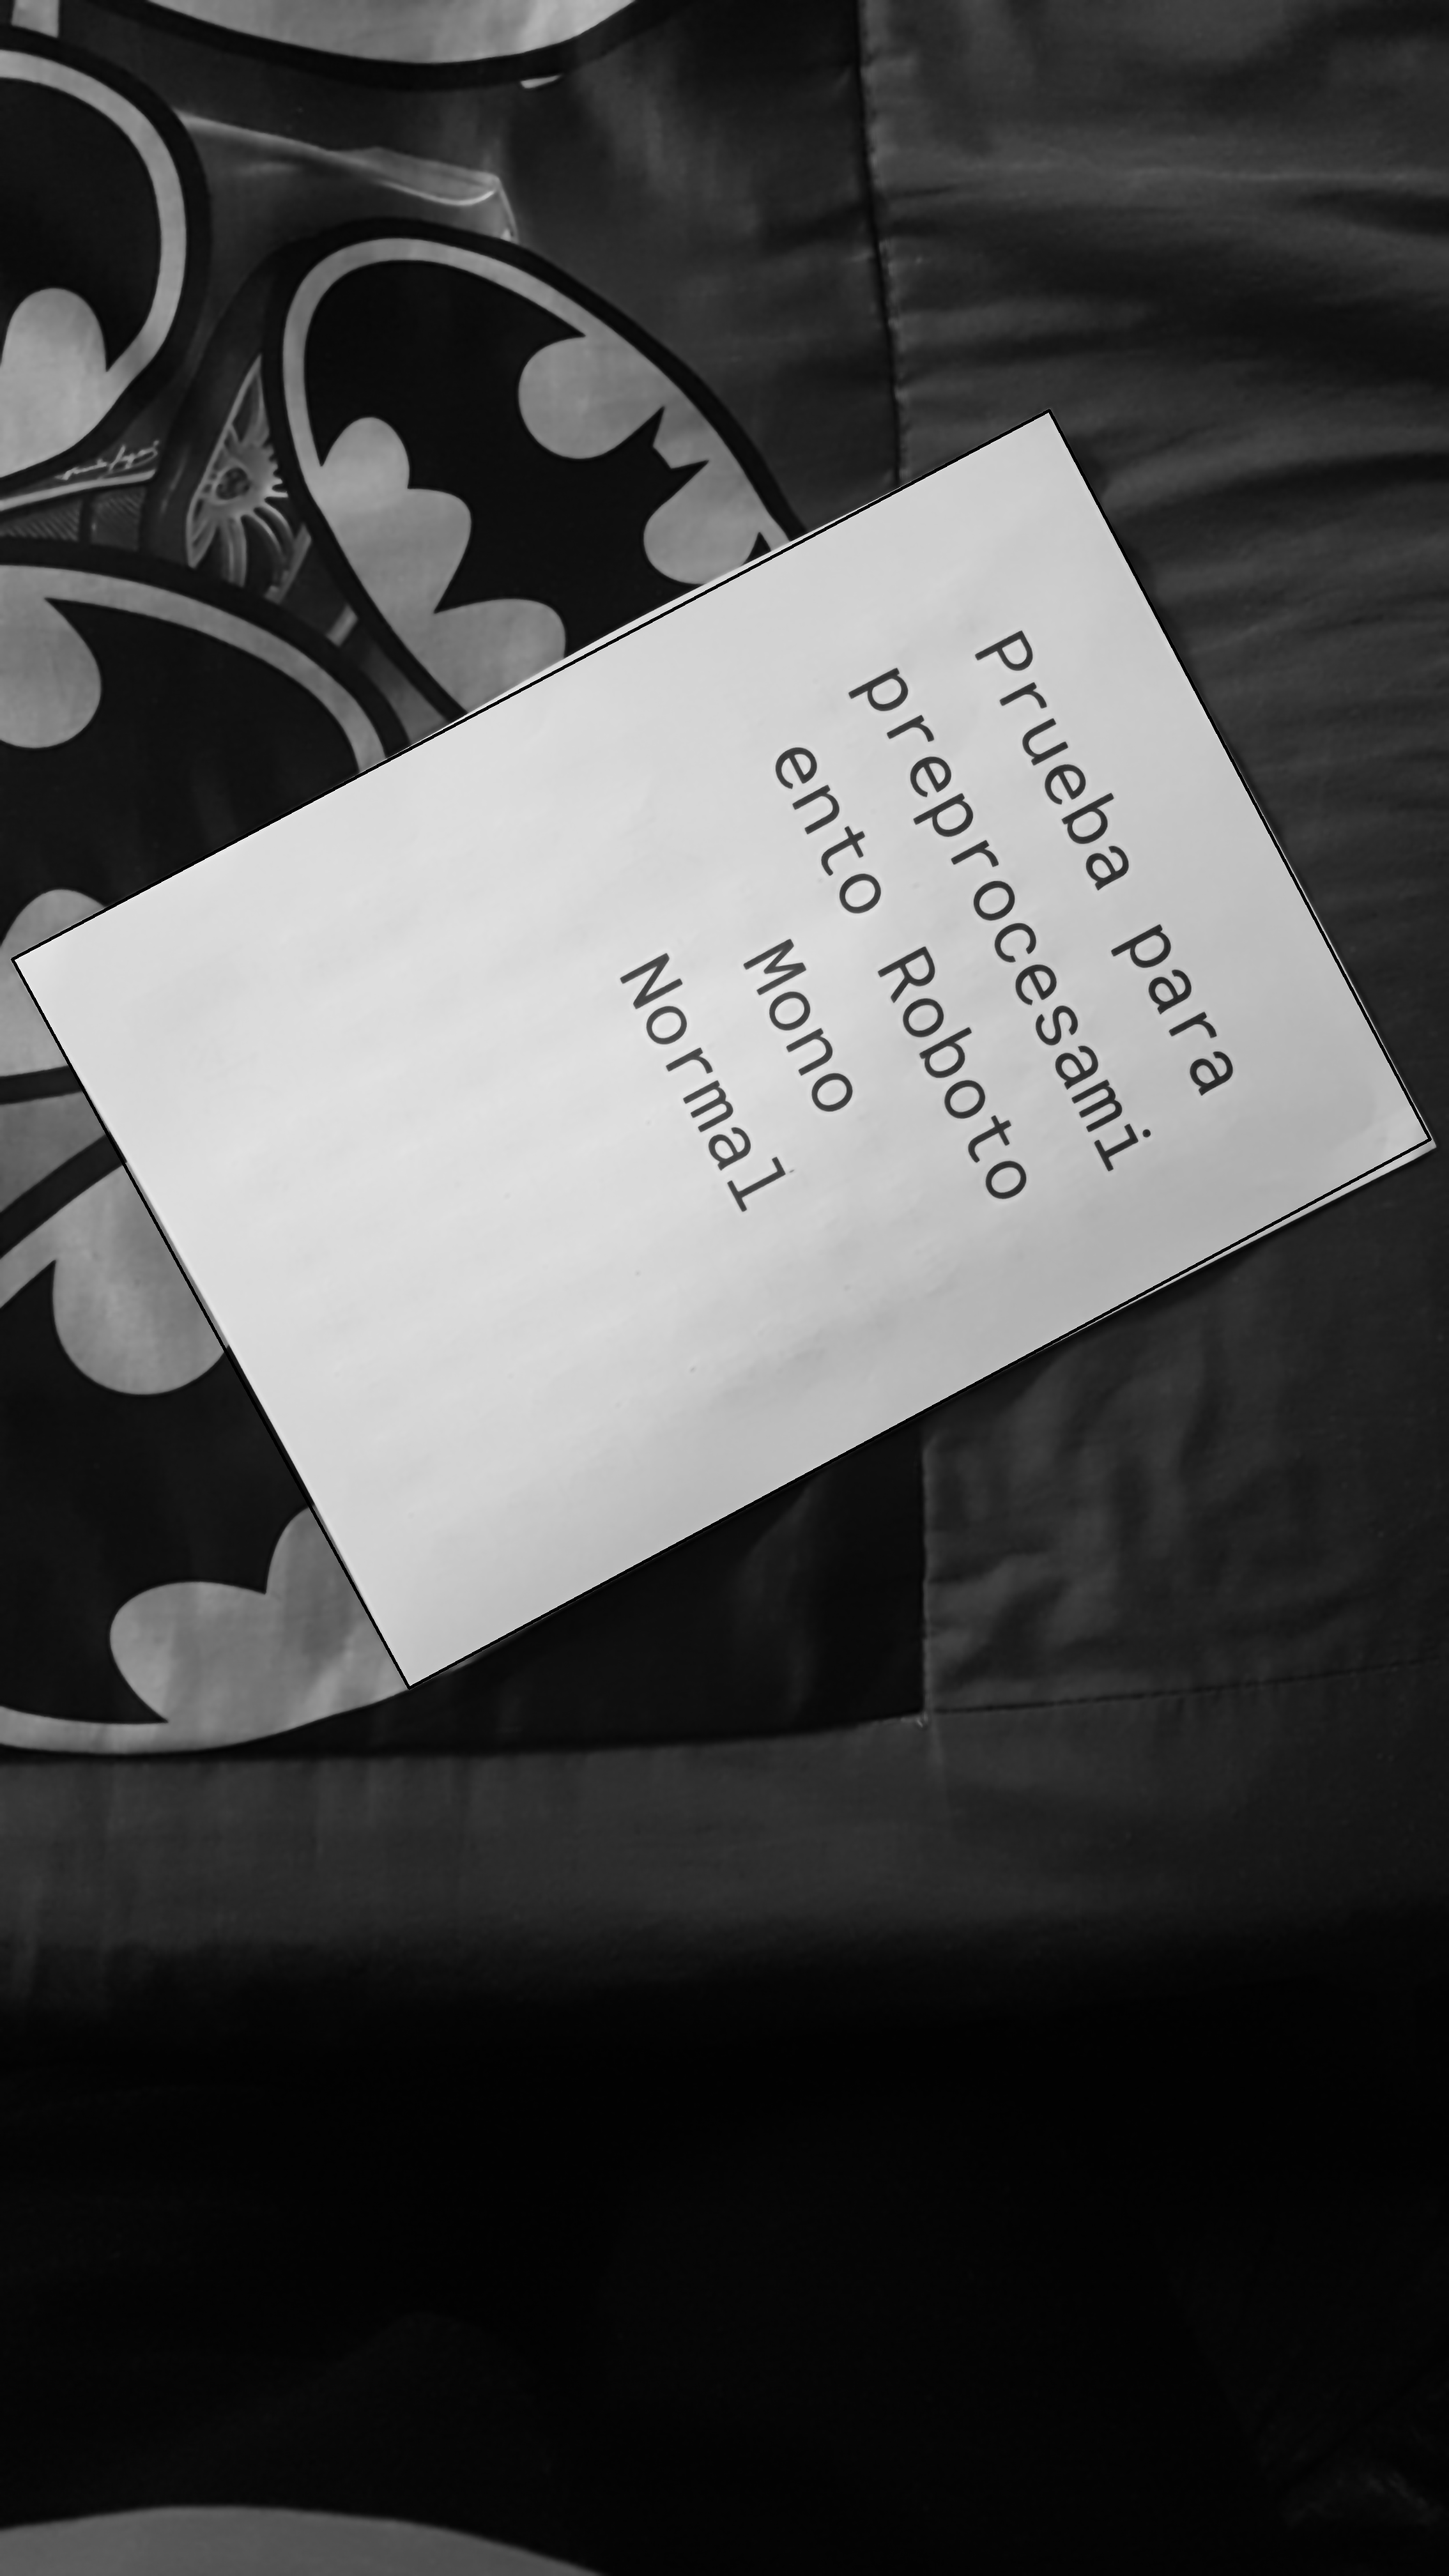

In [168]:
cv2_imshow(test)

In [ ]:
## TODO
# 1. Detectar 4 puntos: DONE =================
# 2. Warp

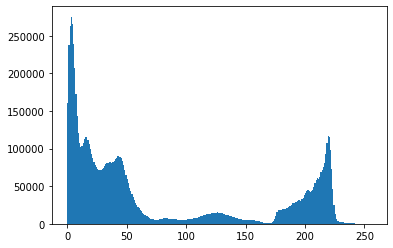

In [ ]:
plt.hist(test.ravel(),256,[0,256])
plt.show()

In [ ]:
len(test.ravel())

9144576

In [ ]:
def dataset(repo,num):
  imagenes = []
  for i in range(1,num+1):
    url = "%s%s.jpg"%(repo,i) #Url con la que descargar imagen 'i'
    imagen = io.imread(url)
    imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY)
    #PREPROCESAR
    imagenes.append(imagen)
  return np.array(imagenes)

In [ ]:
imagenes = dataset('https://raw.githubusercontent.com/Carhuacusma/PDI_Examen_Parcial/main/Data/',3)

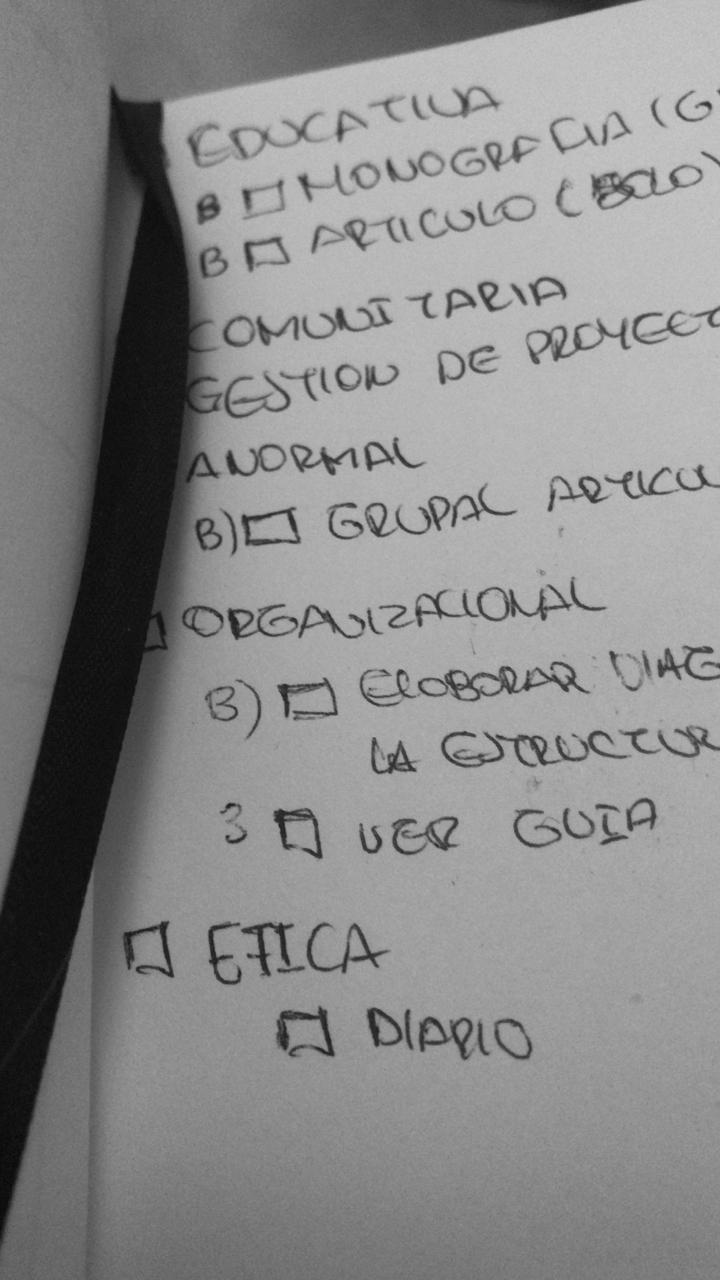

In [ ]:
cv2_imshow(imagenes[2])

#Pruebas Galvan


In [ ]:
 test = io.imread('https://raw.githubusercontent.com/Carhuacusma/PDI_Examen_Parcial/main/Data/test.jpg')


### Resultados y Discusión

<font color='green'> Discuta los **varios resultados obtenidos** por la selección de **diversos parámetros seleccionados** </font>

### Conclusiones

<font color='green'> Redacte, al menos, **5 conclusiones relevantes** referentes a como cubrió su objetivo y que le ayudó a optimizar sus resutlados. </font>